<a href="https://colab.research.google.com/github/jamesbelk0/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 1
James Belk


## Loading Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = 'https://raw.githubusercontent.com/jamesbelk0/sales_predictions/main/sales_predictions.csv'
df1 = pd.read_csv(filename)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

* Checking data types and that values match the required typing.
* Drop duplicates and any data that is not required for data analysis.
* Remedy any missing values 


### Duplicates

In [ ]:
df1.duplicated().sum()

0

### Missing Values

In [ ]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Dropping 'Outlet_Size' due to missing large quanity of values that ultimately are redudant. Compare sales to 'Outlet_Type', and 'Outlet_Location_Type'
# Fill missing values with 'Missing' in 'Outlet_Size' and the median of 'Item_Weight' since there is more than 50% filled in
df1['Outlet_Size'].fillna('Missing', inplace=True)
median_weight = df1['Item_Weight'].median()
df1['Item_Weight'].fillna(median_weight, inplace=True)
display(df1.isna().sum())

print('Dropping "Outlet_Size" due to missing large quanity of values that ultimately are redudant. Compare sales to "Outlet_Type", and "Outlet_Location_Type".')
print("Fill missing values with 'Missing' in 'Outlet_Size' and the median of 'Item_Weight' since there is more than 50% filled in.")

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Dropping "Outlet_Size" due to missing large quanity of values that ultimately are redudant. Compare sales to "Outlet_Type", and "Outlet_Location_Type".
Fill missing values with 'Missing' in 'Outlet_Size' and the median of 'Item_Weight' since there is more than 50% filled in.


#### Categorical Values

In [ ]:
# Categorical Values
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')
df1['Item_Fat_Content'].value_counts()

print("Replace listed value types to a uniform value allowing for smoother access to information.")

Replace listed value types to a uniform value allowing for smoother access to information.


#### Statistics 

In [ ]:
display(df1['Item_Outlet_Sales'].describe())
print("Gather information on the 'Item_Outlet_Sales' column.")

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Gather information on the 'Item_Outlet_Sales' column.


In [ ]:
display(df1['Item_Visibility'].describe())
print("Gather information on the 'Item_Visibility' column.")

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Gather information on the 'Item_Visibility' column.


## Exploratory Visuals

### Bar Charts

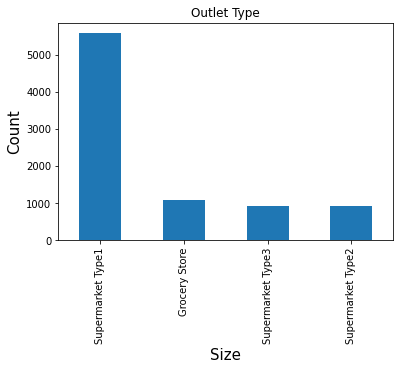

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Shows the favoritism for the dataset to pull information (or have access) from "Supermarket Type1". There is a large bias towards this outlet type.


In [ ]:
outlet_type = df1['Outlet_Type'].value_counts()

outlet_type.plot(kind = 'bar')
plt.title('Outlet Type')
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Size', fontsize = 15)

plt.show()

display(outlet_type)
print('Shows the favoritism for the dataset to pull information (or have access) from "Supermarket Type1". There is a large bias towards this outlet type.')

#### Histogram Charts

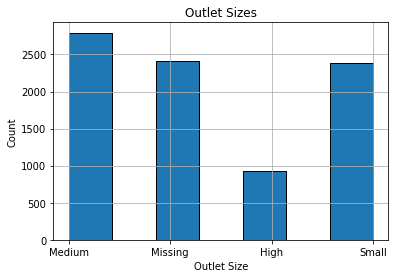

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Almost half of the items are categorized as having "regular" levels of fat compared to the "low fat" items in the data.


In [ ]:
outlet_size = df1['Outlet_Size'].value_counts()

df1['Outlet_Size'].hist(edgecolor='black', bins=7)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Sizes')
plt.show()

display(outlet_size)

print('There are a far larger amount of Medium and Small Outlets compared to the High Outlets.')

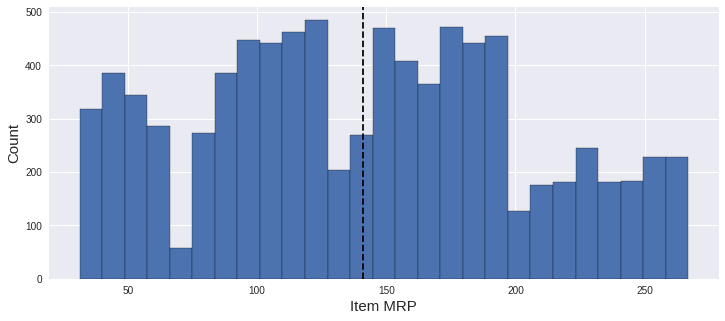

visualization of the Item MRP sold in the Outlets and the counts that the items are sold.
Also includes a line at the average price.


In [ ]:
mean = df1['Item_MRP'].mean()

plt.style.use('seaborn')
plt.figure(figsize=(12,5))
df1['Item_MRP'].hist(bins='auto',
                    edgecolor='black'
                       );
#plt.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Count', fontsize = 15);
plt.xlabel('Item MRP', fontsize = 15);
plt.axvline(mean, color='black', linestyle='dashed')

plt.show()
print('visualization of the Item MRP sold in the Outlets and the counts that the items are sold.')
print('Also includes a line at the average price.')

### Box Plot

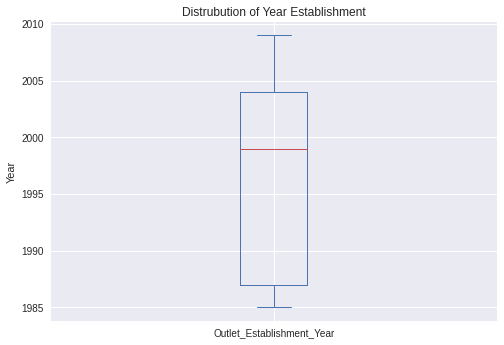

This shows the bias for older establishments with over 50% of them being over 20 years old.


In [ ]:
df1['Outlet_Establishment_Year'].plot(kind='box')
plt.title('Distrubution of Year Establishment')
plt.ylabel('Year')

plt.show()

print('This shows the bias for older establishments with over 50% of them being over 20 years old.')

### Heatmap 

In [ ]:
df1['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
heatmap_df = pd.read_csv(filename)
heatmap_df.head()
coor = heatmap_df.corr()

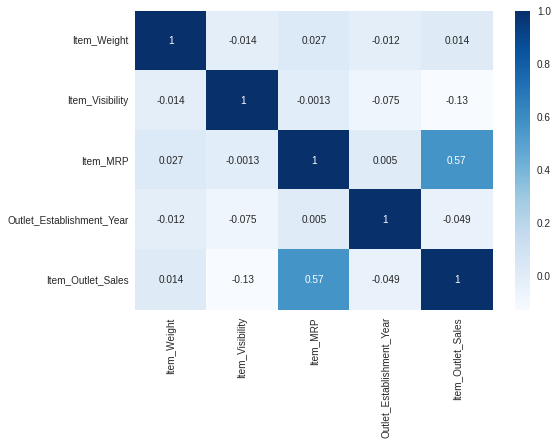

In [ ]:
sns.heatmap(coor, cmap = 'Blues', annot = True);

## Explanatory Visuals 

Explanning how 'Item_Visibility', 'Item_MRP', and 'Item_Outlet_Sales' correlate with each other. 

  * Bar chart comparing 'Item_Visibility' and 'Item_Outlet_Sales'


### Explanatory Bar Chart

In [ ]:
item_vis = df1.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

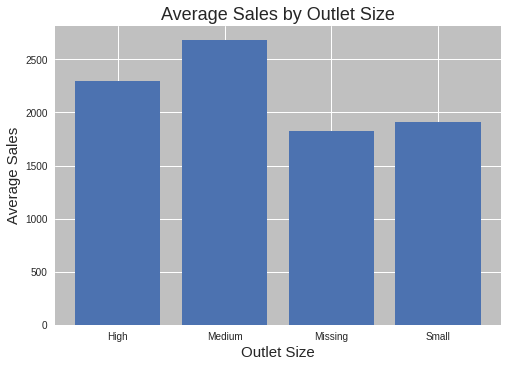

Outlines how the medium Outlet stores have a higher average of sales per the listed stores.


In [ ]:
ax = plt.axes()
plt.bar(item_vis.index, item_vis.values)
plt.ylabel('Average Sales', fontsize = 15)
plt.xlabel('Outlet Size', fontsize = 15)
plt.title('Average Sales by Outlet Size', fontsize = 18)
ax.set_facecolor('silver')

plt.show();
print("Outlines how the medium Outlet stores have a higher average of sales per the listed stores.")

### Explanatory Scatterplot

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


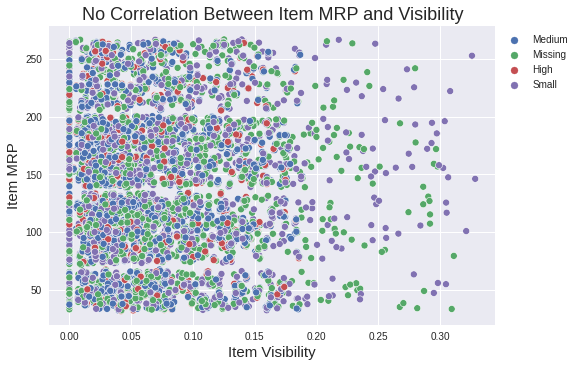

In [ ]:
sns.scatterplot(data = df1, x = 'Item_Visibility', y = 'Item_MRP', hue = 'Outlet_Size')

plt.title('No Correlation Between Item MRP and Visibility', fontsize = 18)
plt.xlabel('Item Visibility', fontsize = 15)
plt.ylabel('Item MRP', fontsize = 15)

plt.legend(bbox_to_anchor=[1,1]);

There is no correlation between the Item's MRP to their visibility. The range of item MRP and the outlets visibility is all over the spectrum when compared to the outlets size. 

### Line Plot

In [ ]:
plot_df = df1.groupby('Outlet_Size').mean()
plot_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,13.006148,0.059957,141.425982,1987.000000,2298.995256
Medium,12.796523,0.060142,140.590514,1997.635875,2681.603542
Missing,12.778479,0.070259,140.322946,2003.000000,1822.626947
Small,12.793224,0.071383,141.970209,1997.072864,1912.149161


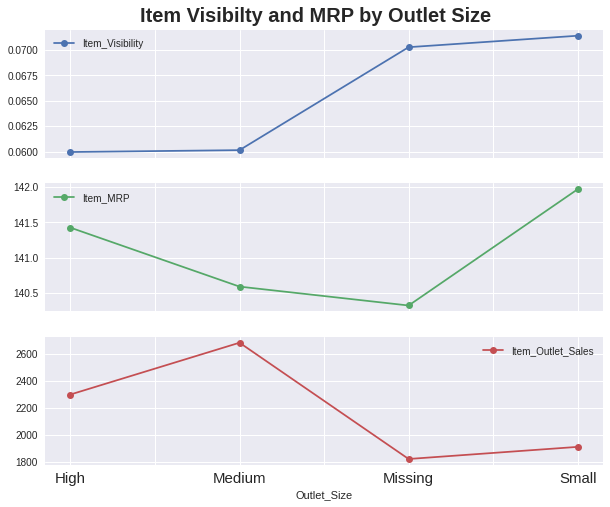

In [ ]:
plot_df.plot(y = ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], subplots = True, marker = 'o', figsize = (10,8));
plt.suptitle('Item Visibilty and MRP by Outlet Size', fontsize = 20, fontweight ='bold', y = .92);
plt.xticks(fontsize = 15);

Clear visualization showing the trends of visibility and MRP per outlet size.

The medium outlet size is by far the most profitable without needing to specilize there visibility. 

# Sales Predictions


## Import and Load Data

In [ ]:
# Imports
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Tree Model Visualization
from sklearn.tree import plot_tree

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [ ]:
# Loading Data
filename = 'https://raw.githubusercontent.com/jamesbelk0/sales_predictions/main/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Copy of the Original DataFrame

In [ ]:
sale_df = df.copy()
sale_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df['Item_Identifier'].nunique()

1559

## Check for Duplicated, Missing, or Erroneous Data

In [ ]:
# Display the sum of missing values
sale_df.isna().sum().sum()

3873

In [ ]:
# Display the sum of missing values
sale_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Checking for duplicate rows
sale_df.duplicated().sum()

0

In [ ]:
sale_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Pre-process

## Split the Data (Validation Split)

In [ ]:
# Split into Train/Test Split
X = sale_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = sale_df['Item_Outlet_Sales']

# split training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
display(X.head())

y[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Instantiate Column Selectors

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [ ]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1


## Instantiate Transformers

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
median_imputer = SimpleImputer(strategy='median')
#Scaler
scaler = StandardScaler()
# One-Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

## Instantiate Pipelines

In [ ]:
# Numeric Pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Unknown', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Instantiate ColumnTransformer

In [ ]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])

## Transform Data

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
                                           

## Results

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 46)




array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

# Evaluate Models

In [ ]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])

### Fitting a Linear Regression Model

In [ ]:
linreg_pipe = make_pipeline(preprocessor, LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('linearregression', LinearRegression())])

### y-hat Predictions

In [ ]:
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

## Function

In [ ]:
model_metrics_df = pd.DataFrame()

In [ ]:
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  model_metrics_df.loc[model_name, 'Train MAE'] = mae
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  model_metrics_df.loc[model_name, 'Train MSE'] = mse
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  model_metrics_df.loc[model_name, 'Train RMSE'] = rmse
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  model_metrics_df.loc[model_name, 'Train R^2'] = r2
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Add Panda's DataFrame

  ## Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## Dummy Model

In [ ]:
# Create an instance of the model
dummy = DummyRegressor(strategy='mean')
# Dummy Pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
# Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('dummyregressor', DummyRegressor())])

In [ ]:
model_metrics(dummy_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, model_name='Dummy Model')

Dummy Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



## Linear Regression Model

In [ ]:
# Create an instance of the model
linreg = LinearRegression()
# Create a model pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
# Fit the model
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# Display Linear Regression Model Metrics
model_metrics(linreg_pipe,
              x_train=X_train, y_train=y_train, 
              x_test=X_test, y_test=y_test, 
              model_name='Linear Regression Model')

Linear Regression Model Train Scores
MAE: 847.1571 
MSE: 1,297,218.6566 
RMSE: 1,138.9551 
R2: 0.5617

Linear Regression Model Test Scores
MAE: 804.1992 
MSE: 1,194,690.0541 
RMSE: 1,093.0188 
R2: 0.5670



## Untuned Linear Regression Model Observations

* This model is 

## Decision Tree Model

### High Bias Model

In [ ]:
# Create Model
dec_tree = DecisionTreeRegressor(max_depth = 1,random_state = 42)
# Create Model Pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the Model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=42))])

In [ ]:
# High Bias Model Metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, model_name='High Bias Decision Tree Model')

High Bias Decision Tree Model Train Scores
MAE: 1,138.5329 
MSE: 2,255,705.5459 
RMSE: 1,501.9006 
R2: 0.2378

High Bias Decision Tree Model Test Scores
MAE: 1,112.1494 
MSE: 2,125,288.2422 
RMSE: 1,457.8368 
R2: 0.2297



### High Variance Model

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth=None, random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
model_metrics(dec_tree_pipe, x_train=X_train, 
              y_train=y_train, x_test=X_test, y_test=y_test, 
              model_name='High Variance Decision Tree Model')

High Variance Decision Tree Model Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

High Variance Decision Tree Model Test Scores
MAE: 1,035.2293 
MSE: 2,202,809.7924 
RMSE: 1,484.1866 
R2: 0.2016



Very low Variance but a High Bias

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth()

45

### Balanced Bias Variance Version

In [ ]:
# Collect max_depth from pipeline
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
# Display
max_depth

45

In [ ]:
depths = range(1, max_depth+1)

# Create a dataframe
scores = pd.DataFrame(columns=['Train Score', 'Test Score'], index = depths)

# Loop through the max_depth values
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)

  train_pred = dec_tree_pipe.predict(X_train)
  test_pred = dec_tree_pipe.predict(X_test)

  train_r2scorce = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  scores.loc[depth, 'Train Score'] = train_r2scorce
  scores.loc[depth, 'Test Score'] = test_r2score

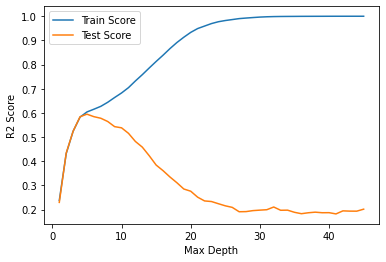

In [ ]:
plt.plot(depths, scores['Train Score'], label = 'Train Score')
plt.plot(depths, scores['Test Score'], label = 'Test Score')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [ ]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending=False)
sorted_scores.head()

,Train Score,Test Score
5,0.603925,0.594719
6,0.61522,0.584405
4,0.582625,0.584005
7,0.62716,0.577857
8,0.643945,0.564407


In [ ]:
# pull best depth for model
best_depth = sorted_scores.index[0]
best_depth

5

In [ ]:
# Instance of model with best depth
dec_tree = DecisionTreeRegressor(max_depth=best_depth, random_state = 42)
# Create model Pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the Model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fddeac0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a6fdde1c0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [ ]:
# Tuned Model Metrics
model_metrics(dec_tree_pipe, x_train=X_train, 
              y_train=y_train, x_test=X_test, y_test=y_test, 
              model_name='Tuned Decision Tree Model')

Tuned Decision Tree Model Train Scores
MAE: 762.6076 
MSE: 1,172,166.0943 
RMSE: 1,082.6662 
R2: 0.6039

Tuned Decision Tree Model Test Scores
MAE: 738.1986 
MSE: 1,118,159.9220 
RMSE: 1,057.4308 
R2: 0.5947



# Recommendation


I would have to recommend the tuned decision model for future use. It has been programmed to accept the best depth and fit for the model so that any future use would auto acclimate to find the best fit of bias/variance. 

The model presented has a balanced bias/variance ratio which presents a trustworthy model. 

It had a R^2 differece of less than .05 and within an acceptable ranges for the other metrics above. 

In [ ]:
model_metrics_df.head()

,Train MAE,Train MSE,Train RMSE,Train R^2
Dummy Model,1360.2184,2.959456e+06,1720.3069,0.000000
Linear Regression Model,847.1571,1.297219e+06,1138.9551,0.561670
High Bias Decision Tree Model,1138.5329,2.255706e+06,1501.9006,0.237797
High Variance Decision Tree Model,0.0000,0.000000e+00,0.0000,1.000000
Tuned Decision Tree Model,762.6076,1.172166e+06,1082.6662,0.603925
